In [114]:
#This program is used to check if there is any corelation among the variable that need to be checked
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [115]:
#Extracting required column from Table
data=pd.read_csv(r"C:\Users\Shridhar Palo\Desktop\Shrikant Patro\Assignment_Dataset\Sample Data for Creative Analysis.csv")
data.head()
data_copy=data.iloc[:,1:4]
#data_copy.head()
data.head()

,Object ID,Results,Cost Per Result,CTR,Creative Attachment,Unnamed: 5
0,1,29536,186,1.48,988,https://www.facebook.com/ads/image/?d=AQII31oc...
1,2,97570,280,1.90,1125,https://www.facebook.com/ads/image/?d=AQJlmbY5...
2,3,75089,166,1.00,3326,https://aiquire-attachments.s3.ap-south-1.amaz...
3,4,92104,111,1.97,725,https://www.facebook.com/ads/image/?d=AQL1me3x...
4,5,60378,429,0.33,344,https://www.facebook.com/ads/image/?d=AQKAE109...


In [116]:
data_copy.head()

,Results,Cost Per Result,CTR
0,29536,186,1.48
1,97570,280,1.90
2,75089,166,1.00
3,92104,111,1.97
4,60378,429,0.33


In [117]:
#Standarize the column for proper result
from sklearn import preprocessing
x = data_copy.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
#Rename Column
df.columns=['Results','Cost Per Result','CTR']
df.head()

,Results,Cost Per Result,CTR
0,0.29536,0.369478,0.740
1,0.97570,0.558233,0.950
2,0.75089,0.329317,0.500
3,0.92104,0.218876,0.985
4,0.60378,0.857430,0.165


In [118]:
x= pd.Series(df["Results"].values)
z= pd.Series(df["CTR"].values)
y= pd.Series(df["Cost Per Result"].values)
xyz=np.array([x,y,z])

In [119]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)

In [120]:
corr_matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [121]:
x.corr(z)

0.0005075274214649239

In [122]:
z.corr(x)

0.0005075274214649239

In [123]:
x.corr(z, method='spearman')

0.0005071764756587538

In [124]:
z.corr(x, method='kendall')

0.0003389430114155975

In [125]:
#As per value obtained above all the variables are not correlated Lets check through visualization

In [126]:
#visualization of correlation between x and y
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [127]:
import scipy.stats

In [128]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [129]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

In [130]:
line

'Regression line: y=0.50+0.00x, r=0.00'

c:\users\shridhar palo\opencv\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


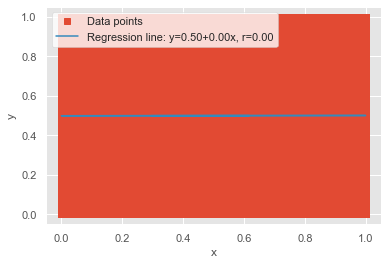

In [131]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

In [132]:
#visualization of correlation between x and z
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [133]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, z)

In [134]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

In [135]:
line

'Regression line: y=0.50+0.00x, r=0.00'

c:\users\shridhar palo\opencv\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


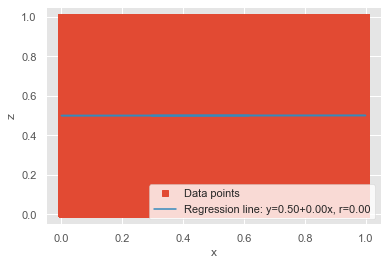

In [136]:
fig, ax = plt.subplots()
ax.plot(x, z, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.legend(facecolor='white')
plt.show()

In [ ]:
#Finally we can see there is 0 corelation among x,y and Z